In [1]:
import json
from agent.agent import get_agent

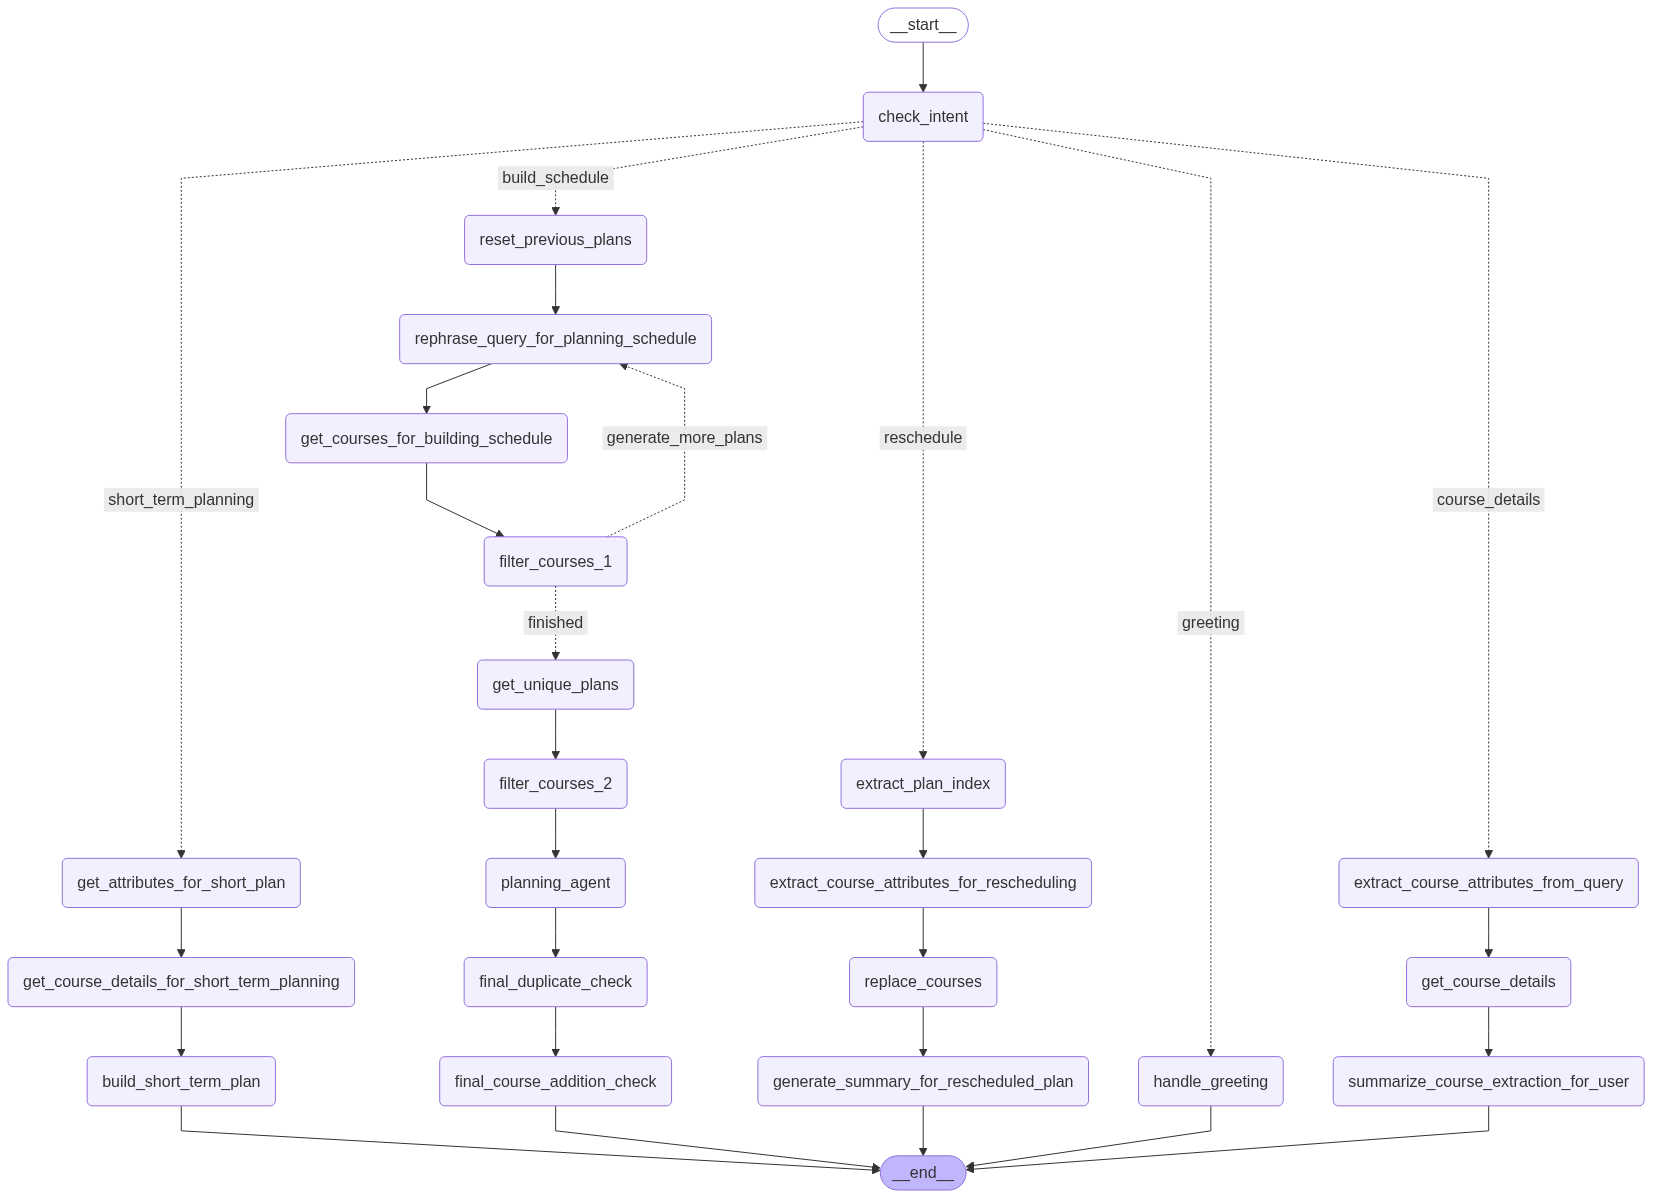

In [2]:
agent = get_agent()
agent

In [3]:
filecontent = []
with open("planTesting.json","r") as f:
    filecontent = json.loads(f.read())
filecontent = filecontent["tests"]

In [74]:
def get_responses(num_plans):
    responses = []
    for idx,plan in enumerate(filecontent[:]):
        config = {"configurable": {"thread_id": idx}}
        plan["messages"] = [["User","Query",plan["query"]]]
        plan["max_number_of_plans"] = num_plans
        key_words = plan["key_words"]
        del plan["key_words"]
        response = agent.invoke(plan,config=config)
        responses.append(response["semester_plans"])
    return responses

In [92]:
def get_generated_text_and_key_words(responses):
    generatedTexts = []
    for query_wise_plans in responses:
        contentStr = ""
        for plan in query_wise_plans:
            for semsters in plan["semester_schedule"]:
                for course in semsters["courses"]:
                    contentStr += course["title"]+" - "+course["description"]+"\n"
            contentStr+="\n"
        generatedTexts.append(set(contentStr.lower().split()))

    filecontent = []
    with open("planTesting.json","r") as f:
        filecontent = json.loads(f.read())
    filecontent = filecontent["tests"]

    key_words  = []
    for test in filecontent:
        key_words.append([chrs.lower() for chrs in list(set(" ".join(test["key_words"]).split(" "))) if chrs.lower() not in ["and","in","of"]])
    return generatedTexts,key_words


In [93]:
def get_coverage(generatedTexts , key_words):
    count = 0
    total = 0
    avg_accuracy = 0
    for index in range(len(key_words)):
        prev_count = count
        total+=len(key_words[index])
        for word in key_words[index]:
            if word in generatedTexts[index]:
                count+=1
        avg_accuracy += (count-prev_count)/len(key_words[index])
    accuracy = (count/total)*100
    avg_accuracy = (avg_accuracy/len(key_words))*100
    return accuracy,avg_accuracy

In [ ]:
def evaluate_on_credits(filecontent,responses):
    expected_credits = [query["max_credits"] for query in filecontent]
    total_plans = 0
    positives = 0
    negatives = 0
    for idx,query_wise_plans in enumerate(responses):
        expected = expected_credits[idx]
        for plan in query_wise_plans:
            plan_credits = plan["total_credits"]
            if plan_credits>expected:
                positives+=1
            elif plan_credits<expected:
                negatives+=1
            total_plans+=1
    exacts = total_plans - (positives+negatives)
    return (negatives*100/total_plans),(exacts*100/total_plans),(positives*100/total_plans),total_plans

<h1>Testing for 1 plan</h1>

In [135]:
# responses = get_responses(num_plans=1)

In [136]:
# with open("llmResponses.json","w+") as f:
#     f.writelines(json.dumps(responses,indent=2))

In [153]:
responses = []
with open("llmResponses.json","r") as f:
    responses = json.loads(f.read())

In [154]:
len(responses)

8

In [155]:
generatedTexts , key_words = get_generated_text_and_key_words(responses=responses)

In [156]:
accuracy,avg_accuracy = get_coverage(generatedTexts,key_words)

In [157]:
print(f"Average Topics Coverage = {avg_accuracy:.2f}%")
print(f"Overall Topics Coverage = {accuracy:.2f}%")

Average Topics Coverage = 82.91%
Overall Topics Coverage = 84.44%


In [158]:
negatives , exacts , positives , total_plan_generated = evaluate_on_credits(filecontent,responses)
print(f"Total plans generated = {total_plan_generated}")
print(f"Plans with less number of credits than required = {negatives:.2f}%")
print(f"Plans with exact number of credits required = {exacts:.2f}%")
print(f"Plans with more number of credits than required = {positives:.2f}%")

Total plans generated = 8
Plans with less number of credits than required = 0.00%
Plans with exact number of credits required = 62.50%
Plans with more number of credits than required = 37.50%


<h1>Testing for 4 plans</h1>

In [144]:
# responses = get_responses(num_plans=4)

In [145]:
# with open("llmResponses4plans.json","w+") as f:
#     f.writelines(json.dumps(responses,indent=2))

In [146]:
responses = []
with open("llmResponses4plans.json","r") as f:
    responses = json.loads(f.read())

In [147]:
generatedTexts , key_words = get_generated_text_and_key_words(responses=responses)

In [148]:
accuracy,avg_accuracy = get_coverage(generatedTexts,key_words)

In [149]:
print(f"Average Topics Coverage = {avg_accuracy:.2f}%")
print(f"Overall Topics Coverage = {accuracy:.2f}%")

Average Topics Coverage = 91.20%
Overall Topics Coverage = 92.22%


In [151]:
negatives , exacts , positives , total_plan_generated = evaluate_on_credits(filecontent,responses)
print(f"Total plans generated = {total_plan_generated}")
print(f"Plans with less number of credits than required = {negatives:.2f}%")
print(f"Plans with exact number of credits required = {exacts:.2f}%")
print(f"Plans with more number of credits than required = {positives:.2f}%")

Total plans generated = 27
Plans with less number of credits than required = 0.00%
Plans with exact number of credits required = 66.67%
Plans with more number of credits than required = 33.33%
